# Model fake news - Covid19

In [1]:
# Bibliotecas do python

import pandas as pd # Biblioteca para carregar dataset
import numpy as np # Manipulação de alegbra linear

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblotecas tirar alertar de mensagens
import warnings 
warnings.filterwarnings("ignore")

# Bibliotecas NLTK
import re
import nltk
import re 
import html 
import string

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [3]:
# Carregando base de dados
# Base de dados
data_1 = pd.read_csv("Constraint_Train.csv")

In [4]:
# Exibindo os 5 primeiras linhas com o comando head()
data_1.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [5]:
# Exibindo os 5 últimos linhas com o comando tail()
data_1.tail()

,id,tweet,label
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake
6419,6420,It has been 93 days since the last case of COV...,real


In [6]:
# Exibindo quantidades de linhas e colunas 
data_1.shape

(6420, 3)

In [7]:
# Exibindo os tipos de dados
data_1.dtypes

id        int64
tweet    object
label    object
dtype: object

In [8]:
# Total de colunas e linhas - data_test
print("Números de linhas: {}" .format(data_1.shape[0]))
print("Números de colunas: {}" .format(data_1.shape[1]))

Números de linhas: 6420
Números de colunas: 3


In [9]:
# Exibindo valores ausentes e valores únicos
print("\nMissing values :  ", data_1.isnull().sum().values.sum())
print("\nUnique values :  \n",data_1.nunique())


Missing values :   0

Unique values :  
 id       6420
tweet    6420
label       2
dtype: int64


In [10]:
# stopwords e pontuação 
pont = string.punctuation
pont = stopwords.words("english")
print(pont)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
data_1

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [15]:
# Label encoder
dummyTrain = pd.get_dummies(data_1["label"]) 
print(dummyTrain)


      fake  real
0        0     1
1        0     1
2        1     0
3        0     1
4        0     1
...    ...   ...
6415     1     0
6416     1     0
6417     1     0
6418     1     0
6419     0     1

[6420 rows x 2 columns]


In [16]:
# Defininfo dummy para label fake 0 real 1
data_1["Previsão"] = dummyTrain["real"]
data_1.head() 

,id,tweet,label,Previsão
0,1,The CDC currently reports 99031 deaths. In gen...,real,1
1,2,States reported 1121 deaths a small rise from ...,real,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,1
4,5,Populous states can generate large case counts...,real,1


In [18]:
# Defenindo base de treino e teste train e test

train = data_1["tweet"]
test = data_1["Previsão"]

word_lemmatizer = WordNetLemmatizer()

In [19]:
# Lemmatization dos dados
def Lemmatization(inst):
    pal = []
    for x in inst.split():
        pal.append(word_lemmatizer.lemmatize(x))
    return (" ".join(pal))

# Preprocessing base de dados
def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# Negações dos textos
def neg(text):
    neg = ["não", "not"]
    neg_dect = False
    result = []
    pal = text.split()

    for x in pal:
        x = x.lower()
        if neg_dect == True:
            x = x + "_NEG"
        if x in neg:
            neg_dect = True
        result.append(x)
    return ("".join(result))

# stopwords dos textos seperando
def stopwords(inst):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# stem - stemmer
def stem(inst):
    stem = nltk.stem.RSLPStemmer()
    pal = []
    for x in inst.split():
        pal.append(stemmer.stem(x))
    return (" ".join(pal))

# Limpeza dos dados recomendo instancia de http 
def dados_limp(inst):
    inst = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (inst)

In [20]:
# Dados limpados da coluna texto
train = [Preprocessing(i) for i in train]
train[:1000]

['cdc currently reports 99031 deaths general discrepancies death counts different sources small explicable death toll stands roughly 100000 people today',
 'states reported 1121 deaths small rise last tuesday southern states reported 640 deaths',
 'politically correct woman (almost uses pandemic excuse reuse plastic bag #coronavirus #nashville',
 '#indiafightscorona 1524 #covid testing laboratories india 25th august 2020 36827520 tests done @profbhargava dg @icmrdelhi #staysafe #indiawillwin',
 'populous states generate large case counts look new cases per million today 9 smaller states showing cases per million california texas al ar id ks ky la ms nv sc',
 'covid act found average person illinois covid19 infecting 111 people data shows infection growth rate declined time factors stayathome order restrictions put place',
 'tested positive #covid19 symptoms stay home away people learn cdc’s recommendations around others covid19 infection',
 'obama calls trump’s coronavirus response cha

In [21]:
# Treino e teste do modelo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 0)

In [23]:
# Sklearn Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)
tf_train = tfidf_vectorizer.fit_transform(x_train)
tf_test = tfidf_vectorizer.transform(x_test)
tf_train.shape

(4494, 12677)

In [24]:
tf_test.shape

(1926, 12677)

# Modelo - Machine learning
- Modelo 01 - Modelo Passive Aggressive Classifier

In [25]:
# Modelo Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

# Nome do algoritmo M.L
model_passive_aggressive = PassiveAggressiveClassifier(max_iter=50)

# Treinamento do modelo
model_passive_aggressive_fit = model_passive_aggressive.fit(tf_train, y_train)

# Score do modelo
model_passive_aggressive_score = model_passive_aggressive.score(tf_train, y_train)

# Previsão do modelo
model_passive_aggressive_predict = model_passive_aggressive.predict(tf_test)

print("modelo passive aggressive: %.2f" % (model_passive_aggressive_score * 100))

modelo passive aggressive: 100.00


In [26]:
# Accuracy do modelo - Passive aggressive classifier
from sklearn.metrics import accuracy_score

accuracy_passive_aggressive = accuracy_score(y_test, model_passive_aggressive_predict)
print("Accuracy - Passive aggressive classifier: %.2f" % (accuracy_passive_aggressive * 100))


Accuracy - Passive aggressive classifier: 90.24


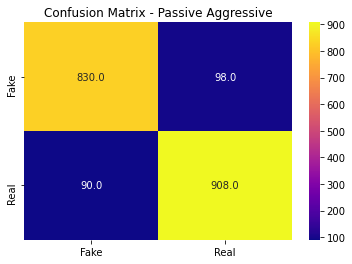

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, model_passive_aggressive_predict)

matrix_confusion = confusion_matrix(y_test, model_passive_aggressive_predict)
ax = plt.subplot()
sns.heatmap(matrix_confusion, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Passive Aggressive'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [28]:
# Classification report
from sklearn.metrics import classification_report
classification = classification_report(y_test, model_passive_aggressive_predict)
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       928
           1       0.90      0.91      0.91       998

    accuracy                           0.90      1926
   macro avg       0.90      0.90      0.90      1926
weighted avg       0.90      0.90      0.90      1926



In [29]:
# Métricas do modelo ML

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Métricas precision
precision = precision_score(y_test, model_passive_aggressive_predict)

# Métrica recall
Recall = recall_score(y_test, model_passive_aggressive_predict)

# Métrica accuracy
Accuracy = accuracy_score(y_test, model_passive_aggressive_predict)

# Métrica F1 Score
F1_Score = f1_score(y_test, model_passive_aggressive_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.909820
3,F1_Score,0.906188
0,precision,0.902584
2,Accuracy,0.902388


# Modelo 02 - Regressão logistica

In [30]:
%%time
# Modelo Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_lr = LogisticRegression()

# Treinamento do modelo
model_lr_fit = model_lr.fit(tf_train, y_train)

# Score do modelo
model_lr_score = model_lr.score(tf_train, y_train)

# Previsão do modelo
model_lr_pred = model_lr.predict(tf_test)

print("Modelo - Regressão logistica: %.2f" % (model_lr_score * 100))

Modelo - Regressão logistica: 96.37
Wall time: 142 ms


In [31]:
# Accuracy do modelo 

accuracy_regression_logistic = accuracy_score(y_test, model_lr_pred)
print("Accuracy - Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Logistic regression: 90.29


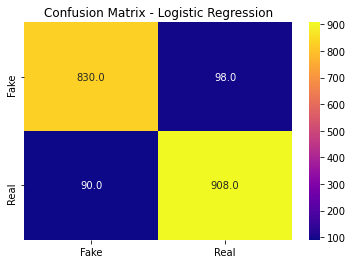

In [34]:
matrix_confusion_2 = confusion_matrix(y_test, model_lr_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Logistic Regression'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [35]:
# Classification report
classification = classification_report(y_test, model_lr_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       928
           1       0.91      0.90      0.91       998

    accuracy                           0.90      1926
   macro avg       0.90      0.90      0.90      1926
weighted avg       0.90      0.90      0.90      1926



In [36]:
# Métricas precision
precision = precision_score(y_test, model_lr_pred)

# Métrica recall
Recall = recall_score(y_test, model_lr_pred)

# Métrica accuracy
Accuracy = accuracy_score(y_test, model_lr_pred)

# Métrica F1 Score
F1_Score = f1_score(y_test, model_lr_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.914198
3,F1_Score,0.905412
2,Accuracy,0.902908
1,Recall,0.896794


# Modelo 03 - XGBoost

In [38]:
from xgboost import XGBClassifier

# Nome do algoritmo M.L
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(tf_train, y_train)

# Score do modelo
xgb_score = xgb.score(tf_train, y_train)

# Previsao do modelo
xgb_pred = xgb.predict(tf_test)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[12:42:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 96.19


In [87]:
# Accuracy do modelo
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 87.90


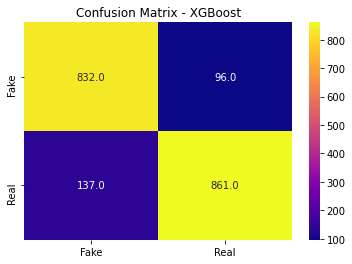

In [42]:
matrix_confusion_3 = confusion_matrix(y_test, xgb_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - XGBoost'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [43]:
classification = classification_report(y_test, xgb_pred)
print("Modelo 03 - XGBoost")
print()
print(classification)

Modelo 03 - XGBoost

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       928
           1       0.90      0.86      0.88       998

    accuracy                           0.88      1926
   macro avg       0.88      0.88      0.88      1926
weighted avg       0.88      0.88      0.88      1926



In [44]:
# Métricas precision
precision = precision_score(y_test, xgb_pred)

# Métrica recall
Recall = recall_score(y_test, xgb_pred)

# Métrica accuracy
Accuracy = accuracy_score(y_test, xgb_pred)

# Métrica F1 Score
F1_Score = f1_score(y_test, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.899687
3,F1_Score,0.880818
2,Accuracy,0.879024
1,Recall,0.862725


# Modelo 04 - Gradient Boosting

In [45]:
%%time

# Importação da biblioteca
from sklearn.ensemble import GradientBoostingClassifier

# Nome do algoritmo M.L
model_gradient_boosting = GradientBoostingClassifier()

# Treinamento do modelo
model_gradient_boosting_fit = model_gradient_boosting.fit(tf_train, y_train)

# Score do modelo
model_gradient_boosting_score = model_gradient_boosting.score(tf_train, y_train)
print("Modelo - Gradient Boosting: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Gradient Boosting: 89.68
Wall time: 6.15 s


In [46]:
# Previsão do modelo
model_gradient_boosting_pred = model_gradient_boosting.predict(tf_test)

In [88]:
# Accuracy do modelo
accuracy_gb = accuracy_score(y_test, model_gradient_boosting_pred)
print("Accuracy - Gradient Boosting: %.2f" % (accuracy_gb * 100))

Accuracy - Gradient Boosting: 86.03


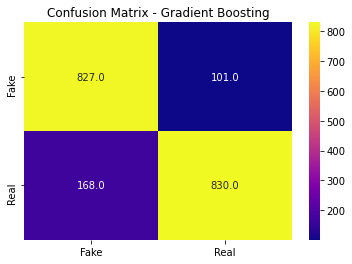

In [50]:
matrix_confusion_4 = confusion_matrix(y_test, model_gradient_boosting_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Gradient Boosting'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [51]:
classification = classification_report(y_test, model_gradient_boosting_pred)
print("Modelo 04 - Gradient Boosting")
print()
print(classification)

Modelo 04 - Gradient Boosting

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       928
           1       0.89      0.83      0.86       998

    accuracy                           0.86      1926
   macro avg       0.86      0.86      0.86      1926
weighted avg       0.86      0.86      0.86      1926



In [52]:
# Métricas precision
precision = precision_score(y_test, model_gradient_boosting_pred)

# Métrica recall
Recall = recall_score(y_test, model_gradient_boosting_pred)

# Métrica accuracy
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)

# Métrica F1 Score
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.891515
3,F1_Score,0.860550
2,Accuracy,0.860332
1,Recall,0.831663


# Model 05 - Decision tree

In [60]:
%%time
# Modelo machine learning - 5

# Importação da biblioteca sklearn o modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Nome do algoritmo M.L
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Treinamento do modelo
model_dtc_fit = model_dtc.fit(tf_train, y_train)

# Score do modelo
model_dtc_score = model_dtc.score(tf_train, y_train)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 69.98
Wall time: 36.9 ms


In [62]:
# Previsão do modelo 
modelo_arvore_cla_1_predict = model_dtc.predict(tf_test)
modelo_arvore_cla_1_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

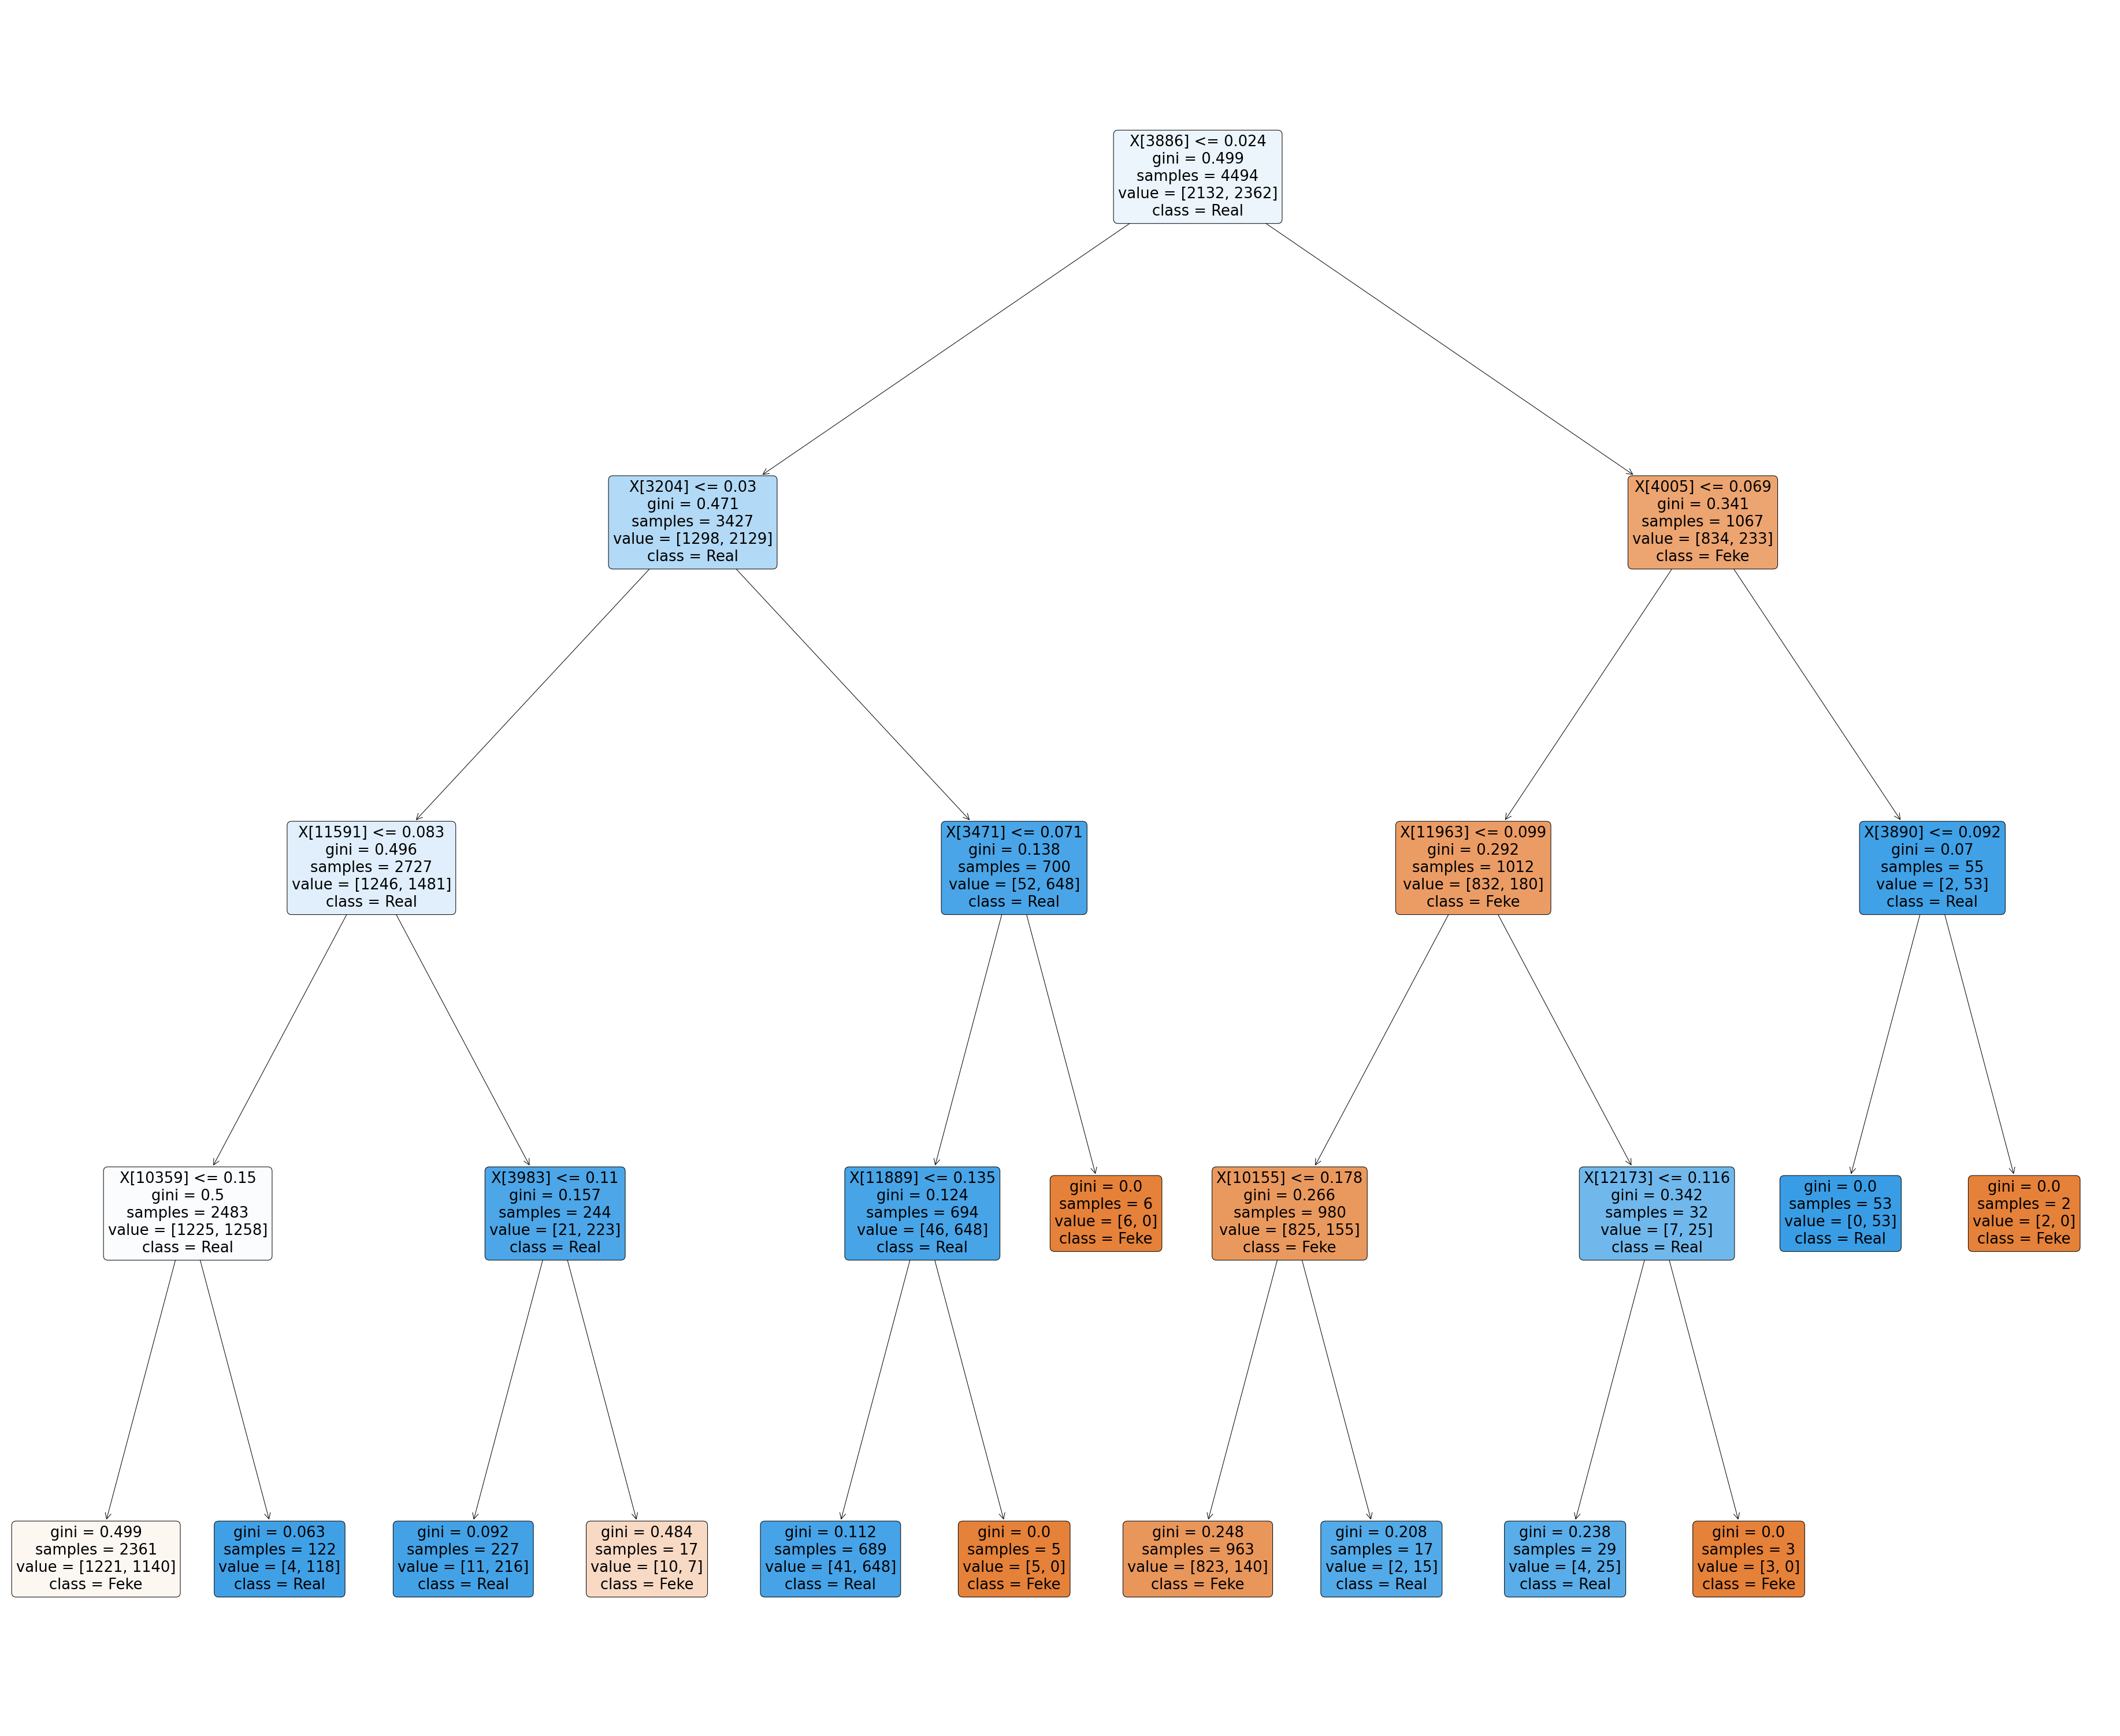

In [67]:
# Gráfico da ávore
from sklearn import tree

fig, ax = plt.subplots(figsize=(65.5, 55), facecolor = "w")
tree.plot_tree(model_dtc, 
               ax = ax, 
               fontsize = 25.8, 
               rounded = True, 
               filled = True, 
               class_names = ["Feke", "Real"])
plt.show()

In [89]:
# Accuracy do modelo
accuracy_dt = accuracy_score(y_test, modelo_arvore_cla_1_predict)
print("Accuracy - Decision Tree: %.2f" % (accuracy_dt * 100))

Accuracy - Decision Tree: 69.94


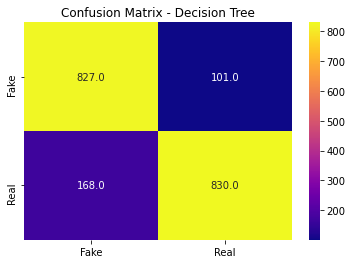

In [71]:
# Decision Tree confusion matrix
matrix_confusion_5 = confusion_matrix(y_test, modelo_arvore_cla_1_predict)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Decision Tree'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [74]:
# Classification report
class_report = classification_report(y_test, modelo_arvore_cla_1_predict)
print("Modelo 05 - Decision Tree")
print()
print(class_report)

Modelo 05 - Decision Tree

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       928
           1       0.94      0.45      0.61       998

    accuracy                           0.70      1926
   macro avg       0.78      0.71      0.68      1926
weighted avg       0.79      0.70      0.68      1926



In [75]:
# Métricas precision
precision = precision_score(y_test, modelo_arvore_cla_1_predict)

# Métrica recall
Recall = recall_score(y_test, modelo_arvore_cla_1_predict)

# Métrica accuracy
Accuracy = accuracy_score(y_test, modelo_arvore_cla_1_predict)

# Métrica F1 Score
F1_Score = f1_score(y_test, modelo_arvore_cla_1_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.942918
2,Accuracy,0.699377
3,F1_Score,0.606390
1,Recall,0.446894


# Modelo 06 - Naive bayes

In [53]:
# Modelo machine learning - 6

# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(tf_train, y_train)

# Score do modelo
model_naive_bayes_scor = model_naive_bayes.score(tf_train, y_train)
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 96.22


In [54]:
# Previsão do modelo
model_naive_bayes_predict = model_naive_bayes.predict(tf_test)

In [90]:
# Accuracy do modelo
accuracy_nb = accuracy_score(y_test, model_naive_bayes_predict)
print("Accuracy - Naive Bayes: %.2f" % (accuracy_nb * 100))

Accuracy - Naive Bayes: 88.79


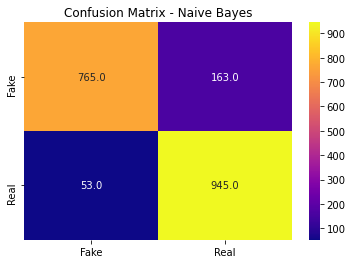

In [57]:
matrix_confusion_5 = confusion_matrix(y_test, model_naive_bayes_predict)

ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Naive Bayes'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [58]:
classification = classification_report(y_test, model_naive_bayes_predict)
print("Modelo 06 - Naive Bayes")
print()
print(classification)

Modelo 06 - Naive Bayes

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       928
           1       0.85      0.95      0.90       998

    accuracy                           0.89      1926
   macro avg       0.89      0.89      0.89      1926
weighted avg       0.89      0.89      0.89      1926



In [59]:
# Métricas precision
precision = precision_score(y_test, model_naive_bayes_predict)

# Métrica recall
Recall = recall_score(y_test, model_naive_bayes_predict)

# Métrica accuracy
Accuracy = accuracy_score(y_test, model_naive_bayes_predict)

# Métrica F1 Score
F1_Score = f1_score(y_test, model_naive_bayes_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.946894
3,F1_Score,0.897436
2,Accuracy,0.887850
0,precision,0.852888


# Modelo 07 Random forest

In [76]:
%%time
# Modelo machine learning - 7

# Importação da biblioteca sklearn o modelo random forest
from sklearn.ensemble import RandomForestClassifier

# Importação da biblioteca sklearn o modelo Random Forest
# max_depth - determinando total de árvore, random_state 0
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) 

# Treinamento do modelo
model_random_forest_fit = model_random_forest.fit(tf_train, y_train) # Dados de treino, teste de x, y

# Score do modelo
model_random_forest_score = model_random_forest.score(tf_train, y_train) # Valor da Accuracy do algoritmo 

print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 60.57
Wall time: 253 ms


In [80]:
# Previsão do modelo
model_random_forest_predict = model_random_forest.predict(tf_test)
model_random_forest_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [92]:
# Accuracy do modelo
accuracy_rf = accuracy_score(y_test, model_random_forest_predict)
print("Accuracy - Random forest: %.2f" % (accuracy_rf * 100))

Accuracy - Random forest: 58.67


In [83]:
classification = classification_report(y_test, model_random_forest_predict)
print("Modelo 07 - Random forest")
print()
print(classification)

Modelo 07 - Random forest

              precision    recall  f1-score   support

           0       0.96      0.15      0.26       928
           1       0.56      0.99      0.71       998

    accuracy                           0.59      1926
   macro avg       0.76      0.57      0.49      1926
weighted avg       0.75      0.59      0.49      1926



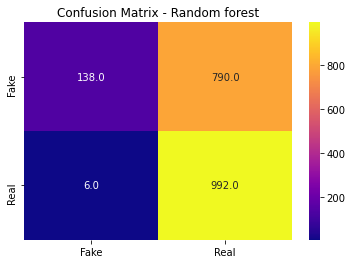

In [85]:
matrix_confusion_5 = confusion_matrix(y_test, model_random_forest_predict)

ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Random forest'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", "Real"]);

In [86]:
# Métricas do modelo
precision = precision_score(y_test, model_random_forest_predict)
Recall = recall_score(y_test, model_random_forest_predict)
Accuracy = accuracy_score(y_test, model_random_forest_predict)
F1_Score = f1_score(y_test, model_random_forest_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.993988
3,F1_Score,0.713669
2,Accuracy,0.586708
0,precision,0.556678


In [96]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Passive aggressive", 
                "Regression Logistic", 
                "Gradient",
                "Random forest", 
                "Decision Tree",
                "Naive Bayes",
                "XGBoost"],

    "Acurácia" :[accuracy_passive_aggressive, 
                      accuracy_regression_logistic, 
                      accuracy_XGBoost, 
                      accuracy_gb,
                      accuracy_dt,
                      accuracy_nb,
                      accuracy_rf]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
1,Regression Logistic,0.902908
0,Passive aggressive,0.902388
5,Naive Bayes,0.887850
2,Gradient,0.879024
3,Random forest,0.860332
4,Decision Tree,0.699377
6,XGBoost,0.586708


In [97]:
## Salvando modelo M.L PLN

import pickle
 
with open('model_passive_aggressive_predict.pkl', 'wb') as file:
    pickle.dump(model_passive_aggressive_predict, file)

with open('model_lr_pred.pkl', 'wb') as file:
    pickle.dump(model_lr_pred, file)

with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)

with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)

with open('modelo_arvore_cla_1_predict.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_cla_1_predict, file)

with open('model_naive_bayes_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_predict, file)

with open('model_random_forest_predict.pkl', 'wb') as file:
    pickle.dump(model_random_forest_predict, file)